<a href="https://colab.research.google.com/github/Overleaff/Image_processing/blob/main/Chap4_1_Edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

# Sobel, Laplacian, Canny detector

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/car/airport.jpeg
#https://raw.githubusercontent.com/Overleaff/image/main/animal/cat.jpg
#https://raw.githubusercontent.com/Overleaff/image/main/car/airport.jpeg
img_path = "airport.jpeg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8716  100  8716    0     0   212k      0 --:--:-- --:--:-- --:--:--  212k


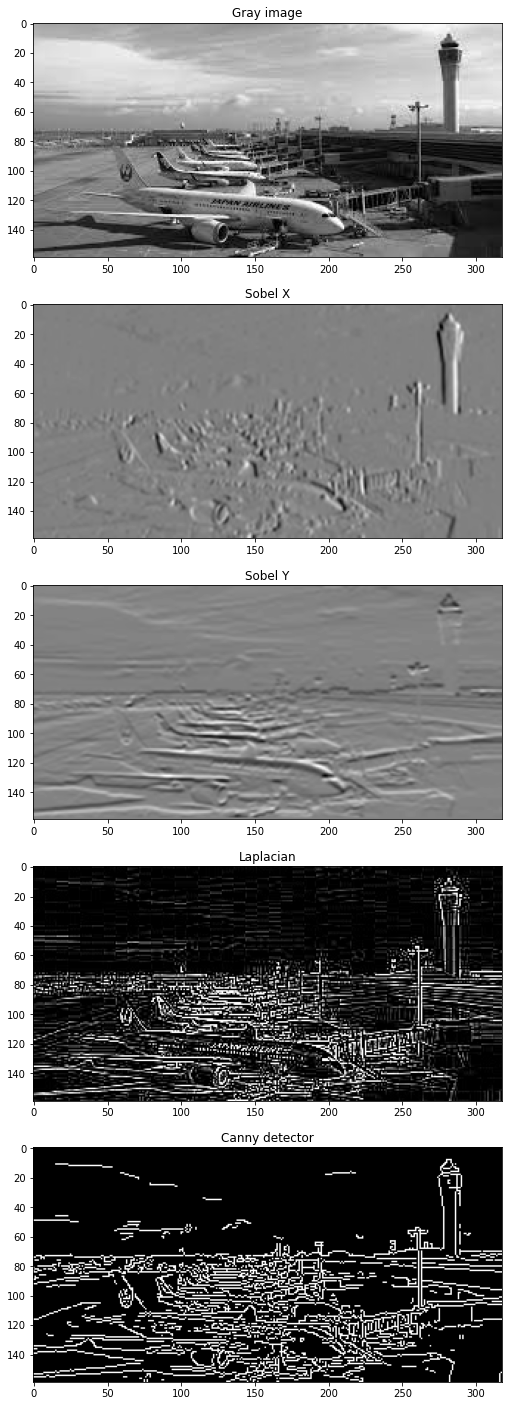

In [ ]:
#initialize array subplot
size = 5
f, axarr = plt.subplots(size,1) 
f.set_figheight(size * 5)
f.set_figwidth(size * 5)
####
img_ori = cv.imread(img_path, 0)

axarr[0].imshow(img_ori, cmap='gray')
axarr[0].title.set_text('Gray image')

####

#afterlaplacian = cv.Laplacian(img_ori, 2)

laplacian = np.array([[1,1,1],[1,-8,1],[1,1,1]])
afterlaplacian = cv.filter2D(src=img_ori, kernel=laplacian, ddepth=-1)

sobelx = cv.Sobel(img_ori,6,1,0,ksize=5)
sobely = cv.Sobel(img_ori,cv.CV_64F,0,1,ksize=5)

axarr[1].imshow(sobelx, cmap ='gray')
axarr[1].title.set_text('Sobel X')

axarr[2].imshow(sobely, cmap ='gray')
axarr[2].title.set_text('Sobel Y')

axarr[3].imshow(afterlaplacian, cmap ='gray')
axarr[3].title.set_text('Laplacian')

### 

edge = cv.Canny(img_ori, 120,150,3)
axarr[4].imshow(edge, cmap ='gray')
axarr[4].title.set_text('Canny detector')

plt.show()

# Hough Transform

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/sudoku.png

edge_linking = "sudoku.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15365  100 15365    0     0   365k      0 --:--:-- --:--:-- --:--:--  365k


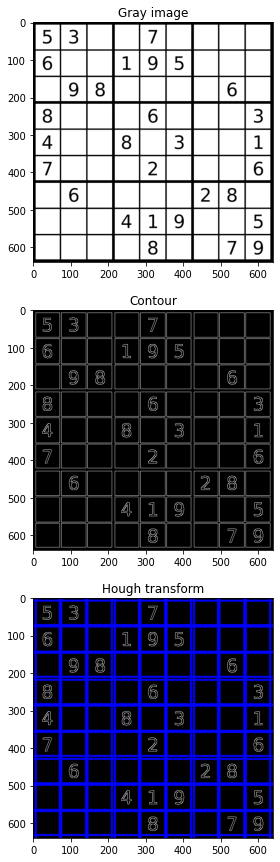

In [ ]:
#initialize array subplot
size = 3
f, axarr = plt.subplots(size,1) 
f.set_figheight(size * 5)
f.set_figwidth(size * 5)

####
img_ori = cv.imread(edge_linking, 0)

axarr[0].imshow(img_ori, cmap='gray')
axarr[0].title.set_text('Gray image')

dst = cv.Canny(img_ori, 100,150,3)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

if lines is not None:
    for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
''' 
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
    for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)'''
##
axarr[1].imshow(dst,cmap = 'gray')
axarr[1].title.set_text('Contour')

axarr[2].imshow(cdst)
axarr[2].title.set_text('Hough transform')


plt.show()

# **Ransac**

# HomeWork Hat gao

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/HW/hatgao/1.png
hatgao1 = "1.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146k  100  146k    0     0  2617k      0 --:--:-- --:--:-- --:--:-- 2617k


In [ ]:
def constrast(image):
    alpha = 1.0 # Simple contrast control
    beta = 0    # Simple brightness control
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
                image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
    return image

(461, 461)
61


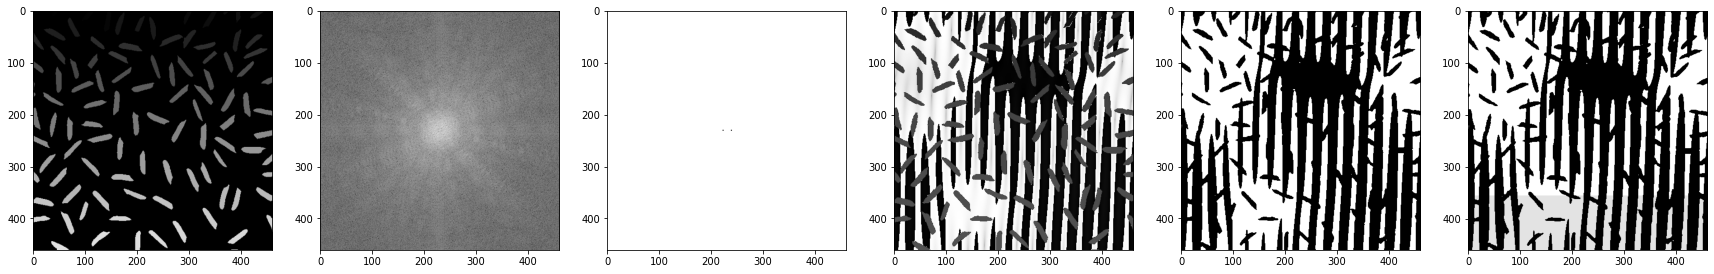

In [ ]:
#initialize array subplot
size = 6
f, axarr = plt.subplots(1, size) 
f.set_figheight(size * 5)
f.set_figwidth(size * 5)
####
hatgao1_img = cv.imread(hatgao4, 0)
print(hatgao1_img.shape)
axarr[0].imshow(hatgao1_img, cmap='gray')

#fourier
dft = cv.dft(np.float32(hatgao1_img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

axarr[1].imshow(magnitude_spectrum, cmap = 'gray')

#MASK 
mask = np.zeros(dft.shape[:2], dtype="uint8")

color = 255
thickness = -1

rectangle = cv2.rectangle(mask, (222,230), (223,231), color, thickness)
rectangle = cv2.rectangle(mask, (238,230), (239,231), color, thickness)
rectangle = cv2.bitwise_not(rectangle)

# another mask
'''
circle = cv2.circle(mask, (230,230), 8, 255, 1)

circle = cv2.bitwise_not(circle)
'''
masked = cv.bitwise_and(dft_shift, dft_shift, mask=rectangle)

axarr[2].imshow(rectangle, cmap = 'gray')

#inverse fourier
idft_shift = np.fft.ifftshift(masked)  # Move the frequency domain from the middle to the upper left corner


ifimg = cv2.idft(idft_shift)#Fourier library function call
ifimg = 20*np.log(cv2.magnitude(ifimg[:, :,0], ifimg[:, :,1]))#Convert to 0-255
ifimg = np.abs(ifimg)
ifimg = np.uint8(ifimg)
axarr[3].imshow(ifimg, cmap = 'gray')

#canny detector

gauss = cv.GaussianBlur(ifimg,(5,5),0)

ret1,thresh1 = cv.threshold(gauss, 86,89,cv.THRESH_BINARY) # trong khoang thi set thanh max (255)
ret2,thresh2 = cv.threshold(gauss, 89,100,cv.THRESH_BINARY)
axarr[4].imshow(thresh2, cmap = 'gray')

# crop an image
width = 461
height = 355

crop_image2 = thresh2[0:height, 0:width]

crop_image1 = thresh1[height: 460, 0:width]
concat = np.concatenate((crop_image2,crop_image1), axis=0)

axarr[5].imshow(concat, cmap = 'gray')

contours, hierarchy = cv2.findContours( concat, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
objects = str(len(contours))
print(objects)

plt.show()

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/HW/hatgao/2.png
hatgao2 = "2.png"

In [ ]:

#initialize array subplot
size = 2
f, axarr = plt.subplots(1,size) 
f.set_figheight(size * 5)
f.set_figwidth(size * 5)
####
hatgao2_img = cv.imread(hatgao2, 0)
hatgao2_img = cv.GaussianBlur(hatgao2_img,(3,3),0)

axarr[0].imshow(hatgao2_img, cmap='gray')

edge = cv2.Canny(hatgao2_img, 149,150,3)
axarr[1].imshow(edge, cmap='gray')
'''
thresh =edge
kernal = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(thresh, kernal, iterations=4)
erosion = cv2.erode(dilation, kernal, iterations = 4)'''

contours, hierarchy = cv2.findContours(
    edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
objects = str(len(contours))
print(objects)

In [ ]:
def removeColor(arr):
  for i in range(1, 460):
    for j in range(1, 460):
        if ((arr[i][j][0] == arr[i][j][1]) and (arr[i][j][2] == arr[i][j][1])): a = 1
        else:
                  arr[i][j][2] = arr[i-1][j][2]
                  arr[i][j][0] = arr[i-1][j][0]
                  arr[i][j][1] = arr[i-1][j][1]
  return arr

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/HW/hatgao/3.png
hatgao3 = "3.png"

In [ ]:
#initialize array subplot
size = 2
f, axarr = plt.subplots(1, size) 
f.set_figheight(size * 7)
f.set_figwidth(size * 7)
####
hatgao3_img = cv.imread(hatgao3, 1)
hatgao3_img = cv2.cvtColor(hatgao3_img, cv2.COLOR_BGR2RGB)

hatgao3_img = removeColor(hatgao3_img)
axarr[0].imshow(hatgao3_img)
hatgao3_img = cv2.cvtColor(hatgao3_img, cv2.COLOR_RGB2GRAY)

hatgao3_img = cv.GaussianBlur(hatgao3_img,(5,5),0)


edge = cv2.Canny(hatgao3_img, 10,150,5)

thresh =edge
kernal = np.ones((3, 3), np.uint8)
erosion = cv2.erode(thresh, kernal, iterations = 2)
opening = cv2.dilate(erosion, kernal, iterations = 2)

axarr[1].imshow(edge, cmap='gray')

contours, hierarchy = cv2.findContours(
    edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
objects = str(len(contours))
print(objects)

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/HW/hatgao/4.png
hatgao4 = "4.png"

In [ ]:

#initialize array subplot
size = 2
f, axarr = plt.subplots(1,size) 
f.set_figheight(size * 5)
f.set_figwidth(size * 5)
####
hatgao4_img = cv.imread(hatgao4, 0)
ret,thresh = cv.threshold(hatgao4_img,0,255,cv.THRESH_BINARY)

axarr[0].imshow(thresh, cmap='gray')
edge = cv2.Canny(thresh, 0,250,3)

axarr[1].imshow(edge, cmap='gray')
'''
thresh =edge
kernal = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(thresh, kernal, iterations=4)
erosion = cv2.erode(dilation, kernal, iterations = 4)'''

contours, hierarchy = cv2.findContours(
    edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
objects = str(len(contours))
print(objects)

#HomeWork Pen